# 安装`Python`环境 (`Windows`操作系统)

## 命令提示符

- 点击左下角“开始”
- 输入 `cmd`
- 打开“命令提示符”
- 在命令提示符中输入以下命令
    - dir （列出当前文件夹下的内容）
    - notepad （新建记事本）
    - python （打开Python控制台）

## 安装`Anaconda`

- 打开bing搜索：https://cn.bing.com
- 选择“国际版”
- 搜索”anaconda“
- 输入邮箱注册，或者点击“skip registration” 跳过注册
- 选择合适的版本（Windows版）Miniconda installer
- 下载后双击exe文件进行安装
- 安装时可以全部选择用默认设置

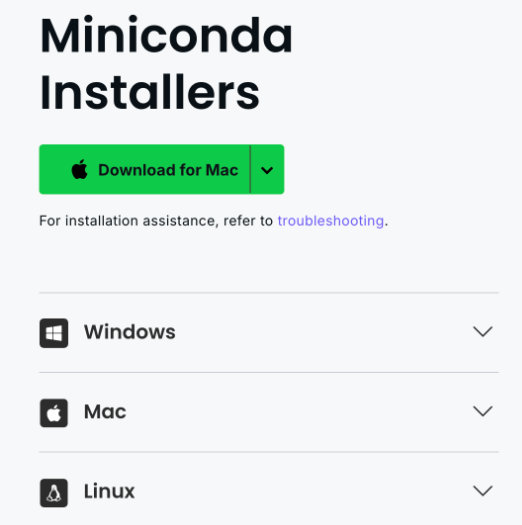

## 使用`Anaconda`

- 点击开始
- 选择Anaconda Prompt
- 会弹出一个类似“命令提示符”的窗口，并且前面提示(base)
- (base)说明已经进入了Anaconda基础环境

## 安装必要的Python包
- `pip config set global.index-url https://pypi.tuna.tsinghua.edu.cn/simple`
- `pip install ipython numpy joblib`

## 打开 `IPython` 进入`Python`环境
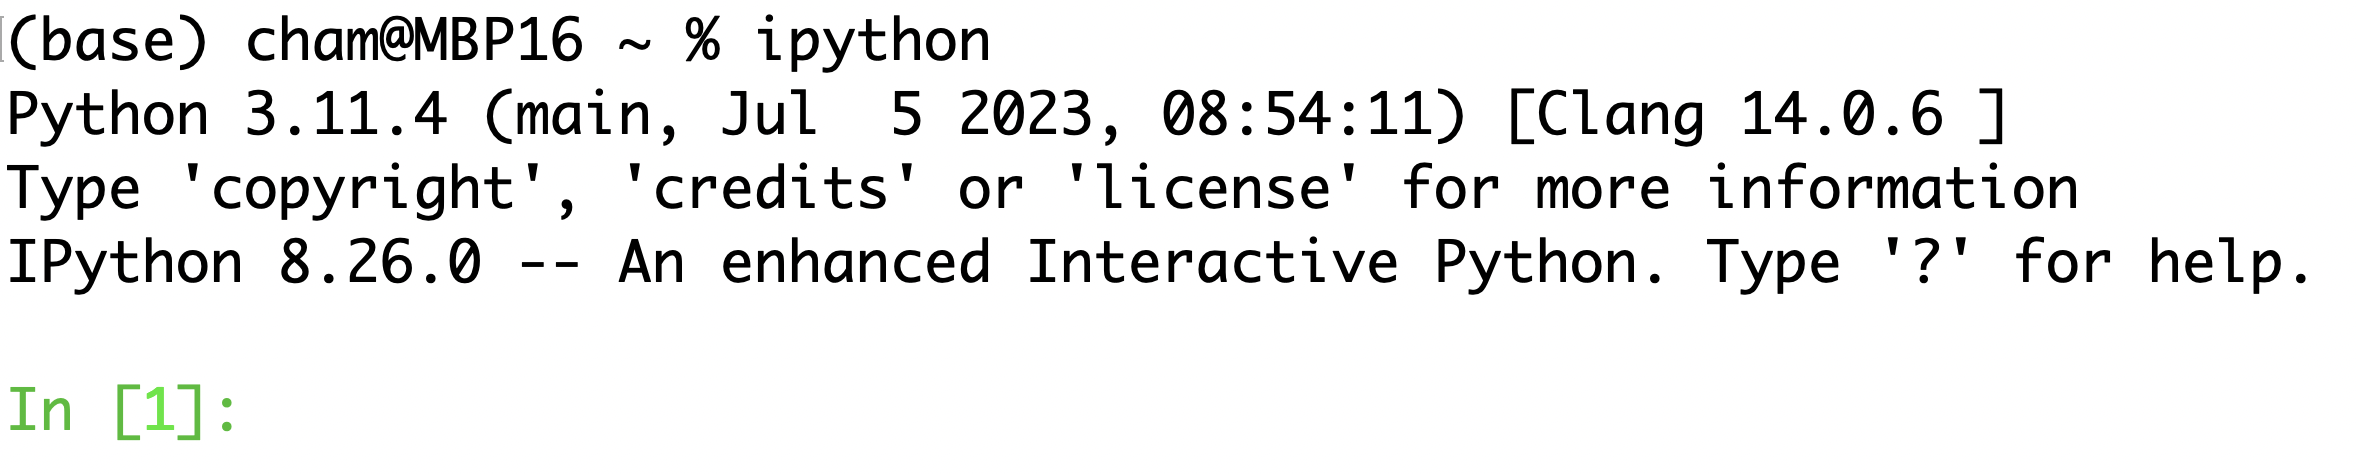

## 练习基础的Python语句

In [1]:
# Hello world
print("Hello world")

Hello world


In [2]:
# 变量赋值
a = 1

In [3]:
a

1

In [4]:
print(a)

1


In [5]:
type(a)

int

In [6]:
# 函数
def print_value_and_type(x):
    print(f"x={x} type={type(x)}")

In [7]:
print_value_and_type

<function __main__.print_value_and_type(x)>

In [8]:
print_value_and_type(123)

x=123 type=<class 'int'>


In [9]:
print_value_and_type("123")

x=123 type=<class 'str'>


In [10]:
print_value_and_type(1)

x=1 type=<class 'int'>


In [11]:
print_value_and_type(1/2)

x=0.5 type=<class 'float'>


In [12]:
print_value_and_type(1/2*2)

x=1.0 type=<class 'float'>


In [13]:
print_value_and_type(int(1/2*2))

x=1 type=<class 'int'>


## 

In [14]:
# 循环
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [15]:
# 判断
if a == 1:
    print("a=1")
else:
    print("a!=1")

a=1


In [16]:
# 求和
sum([1,2,3])

6

In [17]:
print(sum([True, ]))
print(sum([True, False]))
print(sum([True, False, False]))
print(sum([True, False, False, True, True]))

1
1
1
3


## 利用勾股定理求平面上一点`(x,y)`到原点的距离

$d=\sqrt{x^2+y^2}$

In [18]:
import numpy as np
def distance(x, y):
    return np.sqrt(x**2+y**2)

In [19]:
distance(.8, .6)

1.0

## 利用Python实现蒙特卡洛方法求解圆周率

- 如果我们生成一个0到1之间的随机数x，再生成一个0到1之间的随机数y，那么我们可以用distance函数计算(x,y)到原点的距离d，通过与标准半径1进行比较，判断(x,y)是否落在圆内。

- 如果我们重复这样的实验很多次，那么按照面积来计算，落在圆内的概率应该为 $\pi/4$
- 假设我们重复N次，落在圆内的次数为n次，那么我们可以估计 $\pi=n/N*4$

![image](https://pic2.zhimg.com/v2-3dbcad4aa694bf92de820593e07e3e15_r.jpg)

In [20]:
# 生成随机数

import numpy as np

np.random.uniform(low=0, high=1)

0.4809388942247793

In [21]:
# 定义一次实验对应的函数

def f():
    x = np.random.uniform(low=0, high=1)
    y = np.random.uniform(low=0, high=1)
    d = distance(x, y)
    if d<=1:
        return True
    else:
        return False

In [22]:
f()

True

In [23]:
f()

False

In [24]:
%%time

# 重复N次实验
N=1000000
result = []
for i in range(N):
    result.append(f())
pi = sum(result)/N*4
print(f"pi = {pi:.8f}")

pi = 3.14182000
CPU times: user 2.24 s, sys: 12.1 ms, total: 2.25 s
Wall time: 2.26 s


## 进阶：多进程

- 可以通过任务管理器查看CPU使用率，发现上述实验中，只有一个核在工作
- 怎么对程序进行改写和优化可以获得更高的性能呢？

In [25]:
# 先对实验函数进行优化：
# batch直接返回进行n次实验得到的落在圆内的实验次数

def batch(n):
    x = np.random.uniform(low=0, high=1, size=n)
    y = np.random.uniform(low=0, high=1, size=n)
    return sum(distance(x, y)<=1)

In [26]:
batch(100)

75

In [27]:
batch(1000)

786

In [28]:
%%time

# 将100万次实验，拆分成100个批次，每个批次10000次实验，计算明显加快
# 从2秒提升到0.1秒以内

n = 10000
n_batch = 100
print(sum([batch(n) for _ in range(n_batch)])/(n*n_batch)*4)

3.14088
CPU times: user 59.6 ms, sys: 2.19 ms, total: 61.7 ms
Wall time: 61.4 ms


## 多进程

我们尝试利用计算机CPU中的多个核，把上述100个批次分布在不同的核中，加速计算

In [29]:
#安装joblib
!pip install joblib

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [30]:
import joblib
print(joblib.cpu_count()) # CPU中有10个核

10


In [31]:
%%time
# 使用1个核计算1亿次实验结果
n=1000000
n_batch=100
result = joblib.Parallel(n_jobs=1)(joblib.delayed(batch)(n) for _ in range(n_batch))
print(sum(result)/(n*n_batch)*4)

3.14168996
CPU times: user 5.8 s, sys: 245 ms, total: 6.05 s
Wall time: 6.05 s


In [32]:
%%time
# 使用10个核计算1亿次实验结果
n=1000000
n_batch=100
result = joblib.Parallel(n_jobs=10)(joblib.delayed(batch)(n) for _ in range(n_batch))
print(sum(result)/(n*n_batch)*4)

3.14175928
CPU times: user 94.9 ms, sys: 75.1 ms, total: 170 ms
Wall time: 1.03 s
